In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from sklearn import preprocessing
from seaborn import pairplot

In [2]:
best_bar = pd.read_csv('flavors_of_cacao.csv',
                       sep=',', header=0, names=['company', 'bar_name','ref', 'rew_date', 'percent', 'company_loc', 'rate', 'bean_dtype', 'bean_orig'])

In [3]:
bar = best_bar[['company_loc', 'rate', 'percent', 'bean_orig']]

# сортируем, убираем лишнее (группы по странам, где мало информации, неправильное нарзвание этих стран)
bar = bar.groupby('bean_orig')
bar = bar.filter(lambda x: len(x) > 2)

bar = bar.groupby('company_loc')
bar = bar.filter(lambda x: len(x) > 2)

bar = bar[bar.bean_orig != '\xa0']
bar = bar.sort_values(ascending=False, by='rate')

print(bar)

     company_loc  rate percent            bean_orig
78         Italy  5.00     70%            Venezuela
1244     Ecuador  4.00     70%              Ecuador
108       U.S.A.  4.00     70%                 Peru
1294     Belgium  4.00     72%            Venezuela
1292     Belgium  4.00     72%               Mexico
1290     Belgium  4.00     72%           Madagascar
1277      U.S.A.  4.00     67%                 Peru
1276      U.S.A.  4.00     70%           Madagascar
1273      U.S.A.  4.00     75%           Madagascar
502    Guatemala  4.00     70%            Guatemala
123         U.K.  4.00     72%                Haiti
1246     Ecuador  4.00     70%                 Peru
117       U.S.A.  4.00     70%            Nicaragua
1240     Ecuador  4.00     70%             Colombia
1682      France  4.00     63%                 Peru
1203    Scotland  4.00     75%                 Peru
107       U.S.A.  4.00     70%           Costa Rica
1117      France  4.00     67%   Dominican Republic
1685      Fr

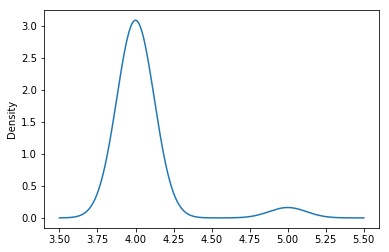

In [4]:
bar.iloc[:20].rate.plot.kde()

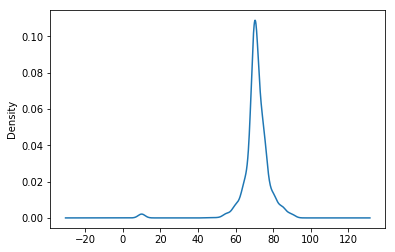

In [5]:
berPercent = bar.percent.apply(lambda x: float(x[:2]))
# berPercent = berPercent.divide(10)
berPercent.plot.kde()


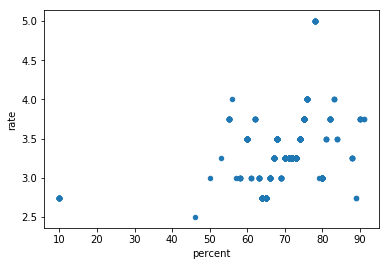

In [6]:
#rate = bar.rate.mul(10)
berFrame = pd.Series(index = berPercent, data = bar.rate).to_frame()
berFrame.reset_index(inplace=True)
berFrame.columns = ['percent','rate']
berFrame = berFrame.dropna(how = 'any')

berFrame.plot(kind='scatter', x='percent', y='rate')


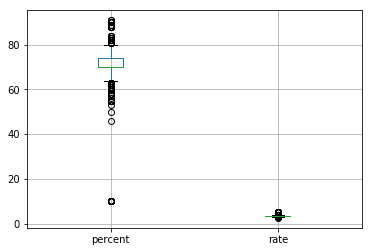

In [7]:
berFrame.boxplot()

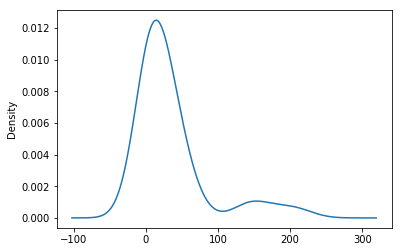

In [8]:
berBeanOrigUnique = bar.bean_orig.value_counts()
maskValue = bar.bean_orig.unique()

berBeanOrigUnique = berBeanOrigUnique.dropna(how = 'any')
berBeanOrigUnique.plot(kind='kde')

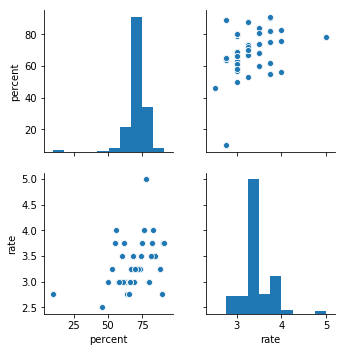

In [9]:
pairplot(berFrame)

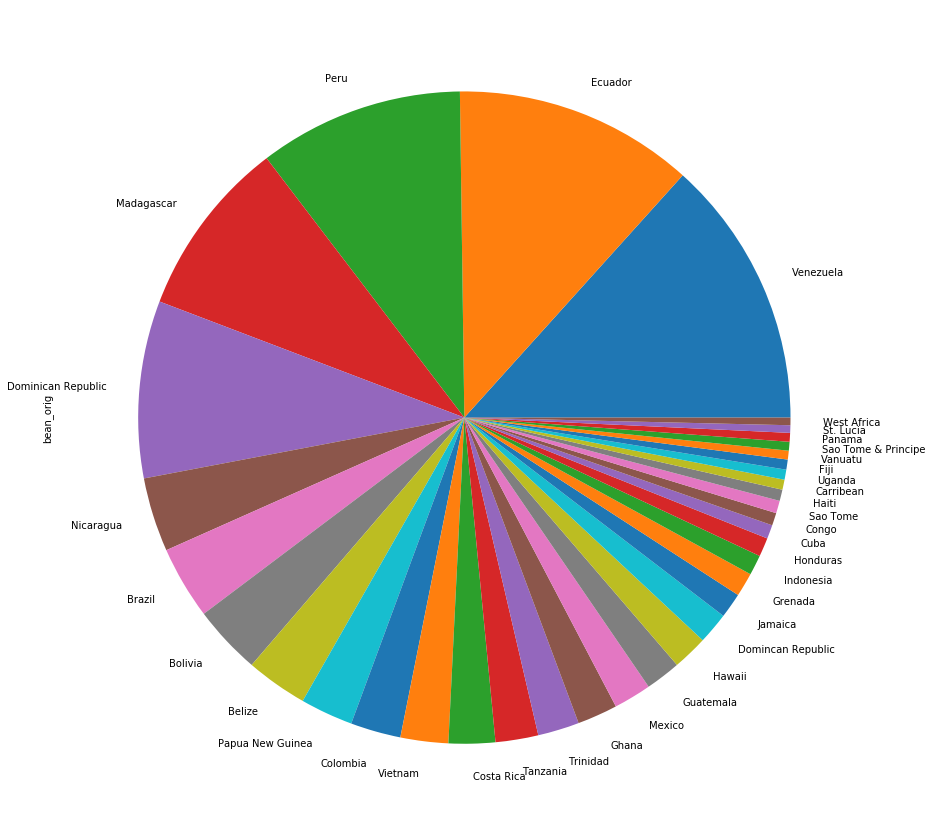

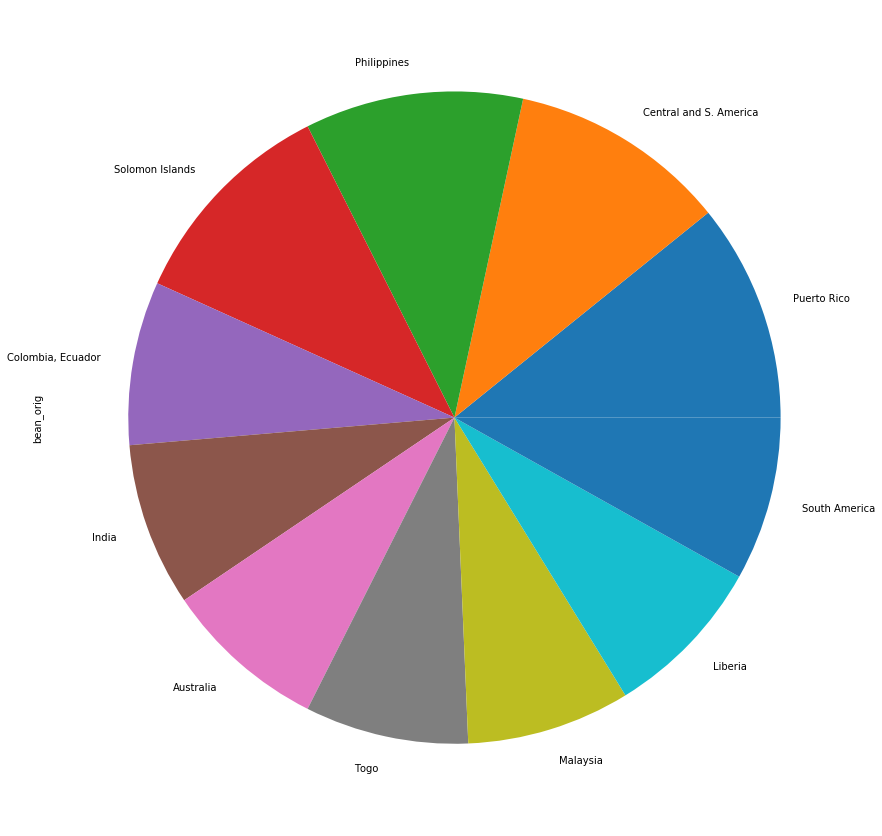

In [10]:
valueCounts = bar.bean_orig.value_counts()

berBeanOrigUnique = valueCounts[valueCounts > 5]
berBeanOrigUnique.plot.pie(figsize=(15, 15))
plt.show()

asasas = valueCounts[valueCounts < 5]
asasas.plot.pie(figsize=(15, 15))
plt.show()

In [11]:
# группируем, сортируем
groupedAndSorted = bar.groupby('bean_orig')['rate'].mean().sort_values(ascending=False)
groupedAndSorted.head(5)

# for key, item in groupedAndSorted:
#     group = groupedAndSorted.get_group(key)
#     print(groupedAndSorted.get_group(key), '\n\n')


bean_orig
South America      3.666667
Solomon Islands    3.437500
Haiti              3.388889
Honduras           3.350000
India              3.333333
Name: rate, dtype: float64

In [12]:
companyRate = bar.groupby('company_loc')['rate'].mean().sort_values(ascending=False)
companyRate.head(5)


company_loc
Amsterdam      3.500000
Poland         3.500000
Netherlands    3.500000
Iceland        3.416667
Vietnam        3.409091
Name: rate, dtype: float64